## Linear Regression Example

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('OmniPower.csv')
df.head()

,Sales,Price,Promotion
0,4141,59,200
1,3842,59,200
2,3056,59,200
3,3519,59,200
4,4226,59,400


In [4]:
df.count() #hence no NaaN

Sales        34
Price        34
Promotion    34
dtype: int64

In [5]:
df.tail()

,Sales,Price,Promotion
29,1882,99,400
30,2159,99,400
31,1602,99,400
32,3354,99,600
33,2927,99,600


In [6]:
print(df.shape)

(34, 3)


In [7]:
%matplotlib inline

## Visualize

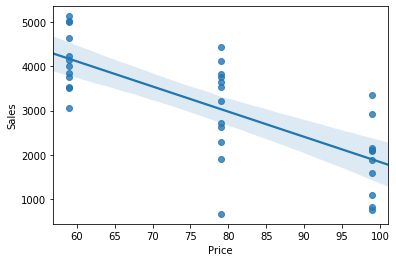

In [11]:
sns.regplot(x='Price', y = 'Sales', data = df)

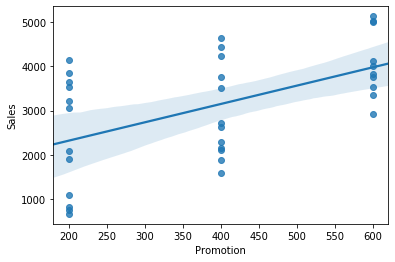

In [12]:
sns.regplot(x='Promotion', y = 'Sales', data = df)

## Model Training

In [66]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

cause = df[['Price','Promotion']]
sales = df.Sales

x_train, x_test, y_train, y_test = train_test_split(cause,sales, test_size=0.2, random_state=0)


In [67]:
print(x_train.shape) # x_train and x_test shape should be 2D array
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27, 2)
(7, 2)
(27,)
(7,)


In [68]:
x_train.head()

,Price,Promotion
16,79,400
10,59,600
33,99,600
30,99,400
24,99,200


In [69]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

# fit out linear model to the train set data
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# print the intercept and coefficients
print(linReg.intercept_)
print(linReg.coef_)

5921.748093803224
[-53.30051094   3.45233591]


## Predict Data

In [71]:
y_hat = linReg.predict(x_test)
print(y_test)
print(y_hat)

11    5015
20    4113
25     761
17    2730
2     3056
26    2088
31    1602
Name: Sales, dtype: int64
[4848.4194943  3782.40927551 1335.46469278 3091.94209354 3467.48513036
 1335.46469278 2025.93187475]


## Validation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# the error is large due to the data in our set are large values, we should use r2-score to check
mean_squared_error(y_test, y_hat) 

216199.81283871792

In [73]:
r2_score(y_test, y_hat)

0.8816955738854297

## Looping the Random State

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
from joblib import dump, load


cause = df[['Price','Promotion']]
sales = df.Sales



In [94]:
for i in range(0,101):
    x_train, x_test, y_train, y_test = train_test_split(cause,sales, test_size=0.2, random_state=i)
    linReg = LinearRegression()
    linReg.fit(x_train, y_train)
    y_hat = linReg.predict(x_test)
    from sklearn.metrics import r2_score
    r2_score(y_test, y_hat)
    print(r2_score(y_test, y_hat))
    if (r2_score(y_test, y_hat) > 0.9301):
        dump(linReg, 'Exercise1_linRegModel.joblib')
        print("Dumped linRegModel.")
        break

0.8816955738854297
0.3143615412673306
0.6680776357599827
0.6924470263693848
-0.3913956556615201
0.6801387956037874
0.8308976886017426
0.6635841939515162
0.7945778471279848
0.6186189025387596
0.780856307572587
0.5962112227220913
-0.34194903406989274
0.2362828402330659
-0.19940320061263384
0.5859533982972074
0.7226920322981251
0.8582459471107551
0.5190084034071663
0.6974029064158241
0.6448194334656256
0.6849053402477139
0.28034427531640516
0.6301419637610903
0.5599593511401848
0.7611349976094781
0.7531176982311574
0.8203401801736568
0.31161724601346696
0.6816585229523643
0.7646088912868395
0.722111652773569
0.7093741376254126
0.8890603874181103
0.6581507795319037
0.46624082119839483
0.5687755937947673
0.5784715460514473
0.23701657768938644
0.7001814694157846
0.12878445532000493
0.8453909602103746
0.7358802563295199
0.6565634193287324
0.7508401521490028
0.7024479976478817
0.28065964077138017
0.7882862522730256
0.7275357159113655
0.5488179628844094
0.9041884672900006
0.6892070736383482
0.3

## Test linRegModel

In [95]:
linRegModel = load('Exercise1_linRegModel.joblib')

In [96]:
y_hat = linRegModel.predict(x_test)
print(y_test)
print(y_hat)

11    5015
9     5120
28    2114
30    2159
31    1602
6     3507
25     761
Name: Sales, dtype: int64
[4812.50406504 4812.50406504 2089.05284553 2089.05284553 2089.05284553
 4135.88211382 1412.43089431]
